# Introduction to Data Analysis in Python


## Reading from a file
### One of the most common situations is that you have some data file containing data you want to read. 

### _Common formats that pandas can work with:_

#### - Comma separated tables (or tab-eparated or space-separated etc)
#### - Excel spreadsheets
#### - HDF5 files
#### - SQL databases

In [43]:
import pandas as pd

In [44]:
city_population_file = "https://milliams.com/courses/data_analysis_python/city_pop.csv"
census = pd.read_csv(
    city_population_file, 
    skiprows = 5,
    sep = ";",
    na_values = ["-1"],
    index_col = "year",
)

In [45]:
census["London"][2001] # Get information for London  in 2001

7.322

In [46]:
df = pd.read_csv(
    "https://milliams.com/courses/data_analysis_python/cetml1659on.dat", #file name
    skiprows = 6, # skip header
    delim_whitespace = True, # whitespace separated
    na_values =['-99.9', '-99.99'], # NaNs
)
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63


In [47]:
df.tail()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
2015,4.4,4.0,6.4,9.0,10.8,14.0,15.9,15.9,12.6,11.0,9.5,9.7,10.31
2016,5.4,4.9,5.8,7.5,12.5,15.2,16.9,17.0,16.0,10.9,5.6,6.0,10.34
2017,4.0,6.1,8.7,8.9,13.2,16.0,16.8,15.6,13.5,12.4,6.8,4.8,10.58
2018,5.3,2.9,4.9,9.8,13.2,16.1,19.1,16.6,13.7,10.6,8.3,6.9,10.68
2019,4.0,6.7,7.8,9.1,11.1,14.2,17.5,17.1,14.3,NaN,NaN,NaN,NaN


In [48]:
df[df < 0] = None

### Excercise
#### - How many years had a negative average temperature in January?

In [49]:
len (df[df["JAN"] < 0])

0

In [50]:
df[df["JAN"] < 0] ["JAN"].count()

0

#### - What was the average temperature in June Over the years in the data set?

In [51]:
df["JUN"].mean()

14.334903047091412

### Plotting data with matplotlib

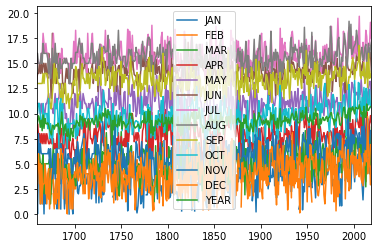

In [52]:
df.plot() # Simplest method of plotting

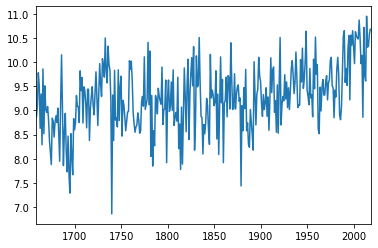

In [53]:
year_plot = df["YEAR"].plot()

In [54]:
year_plot.set_ylabel("Temperature ($^\circle$C)") #Add label with superscript degrees celcius

Text(3.200000000000003, 0.5, 'Temperature ($^\\circle$C)')

In [55]:
type("hello") # without r

str

In [56]:
type(r"hello") # with r changes the way compiler reads string before doing anything , mean don't do anything 'til you see another quotation mark'

str

In [57]:
df.index # gives us just the years

Int64Index([1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668,
            ...
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', length=361)

In [58]:
from pandas import Series

In [59]:
years = Series(df.index, index = df.index).apply(str)

In [68]:
years.apply(   lambda x:  x[:3]+"0"  )

1659    1650
1660    1660
1661    1660
1662    1660
1663    1660
        ... 
2015    2010
2016    2010
2017    2010
2018    2010
2019    2010
Length: 361, dtype: object

In [69]:
df["decade"] = decade

In [70]:
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR,decade
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87,1650
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10,1660
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78,1660
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52,1660
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63,1660


In [71]:
by_decade = df.groupby("decade").mean()# Grouping

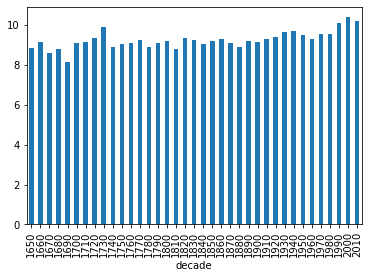

In [72]:
by_decade["YEAR"].plot.bar() # create a bar plot

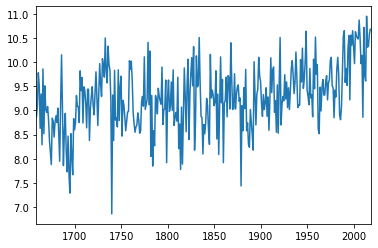

In [75]:
import matplotlib.pyplot as plt # think in figures and axes

fig, ax = plt.subplots()

df["YEAR"].plot(ax =ax)

fig.savefig("myplot.png") # save figure

In [77]:
#![](myplot.png) # display a picture

### Making plots look prettier
#### While useful, matplotlib's power comes from its cofigurability.
#### Throughout this section we'll also need to use some math functions suc as sin an cos, they are provided by numpy, or  numerical Python

In [67]:
import numpy as np 

##### Start with a simple DataFrame containing two columns, one with values of cosine, the other with values of sine.

In [ ]:
import matplotlib.pyplot as plt
from pandas import DataFrame

##### We make x wich is 254 regularly spaced values from -pi to pi. We then make the cos and sin data by passing X to np.cos and np.sin:

In [ ]:
X = np.linspace(-np.pi, np.pi, 256, endpoint = True)
data = {'cos': np.cos(X), 'sin': np.sin(X)}
trig = DataFrame(index = X, data = data)

trig.plot()
plt.show()

###  Changing colours and line widths
#### Firs step, we want to have the cosine in blue and the sine in red and a slightly thicker line for both. To do this we need separate calls to the plot methods, one for each columnin our DataFrame.

#### In matplotlibs, simple plots are called Axes and the "page" as a whole are called Figures. We csll the plt.subplots() which creates a single page with a single plot on it. It returrns a pair of values: (figure, plot) wich we assign to variables fig and ax.

In [ ]:
fig, ax = plt.subplots()

trig["cos"].plot(color = "blue", linewidth = 2.5, linestyle = "-", ax =ax)
trig["sin"].plot(color = "red", linewidth = 2.5, linestyle = "-", ax= ax)

plt.show()

### Setting ticks
#### Current ticks are not ideal because they do not show the interesting values for sine and cosine. We'll change them such thatthey only show these values.

#### for more advanced specifications of where the ticks should appear, matplotlib provides tick locators but for our simple case, callingax.set_xticks is sufficient.


In [ ]:
fig, ax = plt.subplots()

trig["cos"].plot(colour = "green", linewidth = 2.5, linestyle = "-", ax = ax)
trig["sin"].plot(colour = "orange", linewidth = 2.5, linestyle = "-", ax = ax)

# New code
ax.set_xticks([-np.pi, -np.pi])